In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Replace 'your_file.csv' with the name of your CSV file
df = pd.read_csv('../../Warehouse/Reviews/app_reviews_merged.csv')

In [3]:
df['at'] = pd.to_datetime(df['at'])
df = df.set_index('at')

In [4]:
# Define positive and negative sentiment threshold (customize as needed)
positive_threshold = 4
negative_threshold = 2

# Resample by week and count positive and negative reviews
weekly_df = df.resample('W').agg({
    'score': [
        ('positive_reviews', lambda x: (x > positive_threshold).sum()),
        ('negative_reviews', lambda x: (x < negative_threshold).sum())
    ]
})

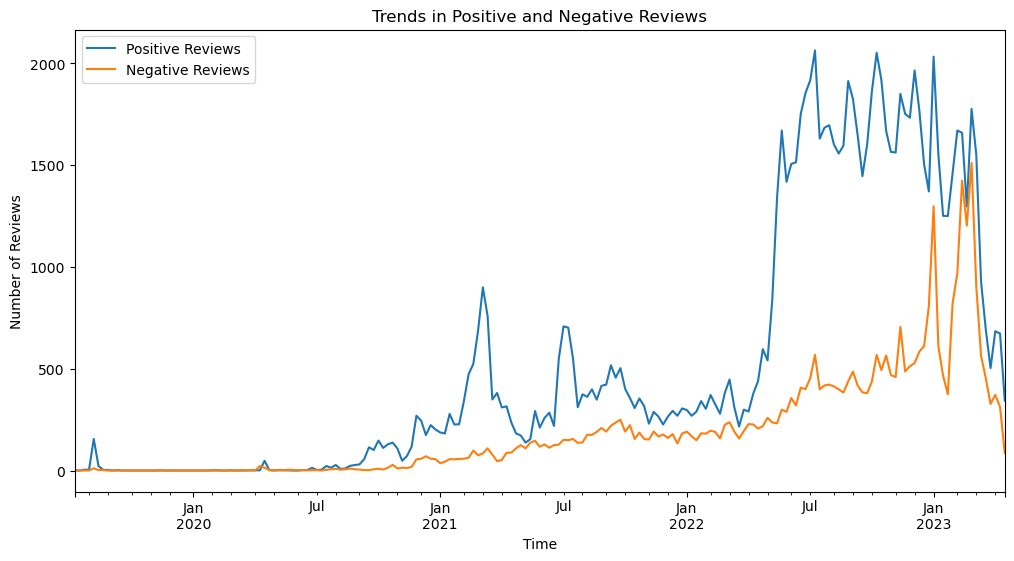

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

weekly_df['score']['positive_reviews'].plot(ax=ax, label='Positive Reviews')
weekly_df['score']['negative_reviews'].plot(ax=ax, label='Negative Reviews')

ax.set_title('Trends in Positive and Negative Reviews')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Reviews')
ax.legend()

plt.show()

In [6]:
daily_df = df.resample('D').agg({'score': 'mean'})

In [7]:
# Choose a window size (e.g., 7 days for a weekly rolling average)
window_size = 7

rolling_average = daily_df.rolling(window=window_size).mean()

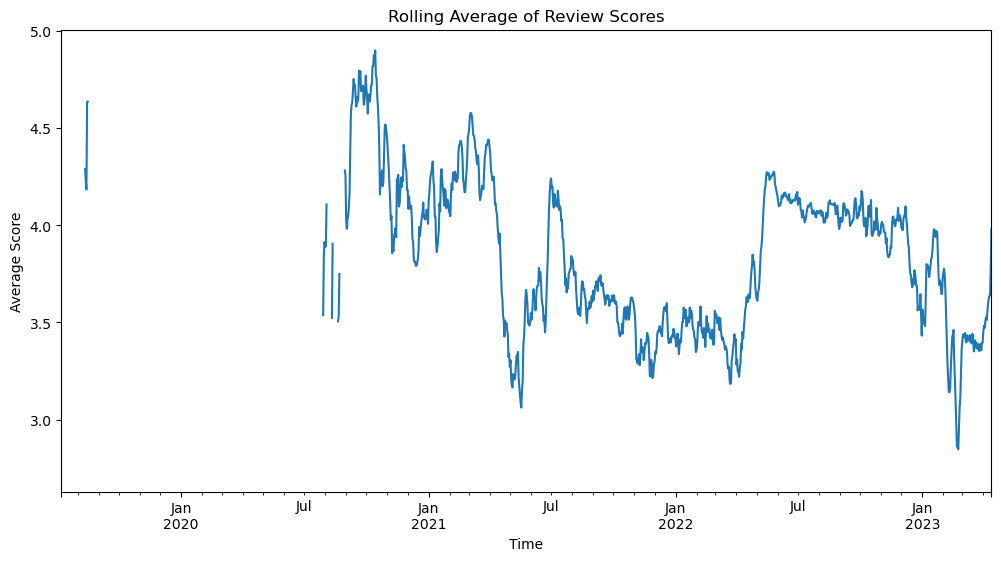

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

rolling_average['score'].plot(ax=ax)

ax.set_title('Rolling Average of Review Scores')
ax.set_xlabel('Time')
ax.set_ylabel('Average Score')

plt.show()

In [10]:
weekly_df.to_csv('weekly_positive_negative_reviews.csv')
rolling_average.to_csv('rolling_average_review_scores.csv')
fig1, ax1 = plt.subplots(figsize=(12, 6))

weekly_df['score']['positive_reviews'].plot(ax=ax1, label='Positive Reviews')
weekly_df['score']['negative_reviews'].plot(ax=ax1, label='Negative Reviews')

ax1.set_title('Trends in Positive and Negative Reviews')
ax1.set_xlabel('Time')
ax1.set_ylabel('Number of Reviews')
ax1.legend()

plt.savefig('trends_positive_negative_reviews.png', dpi=300)
plt.close(fig1)

In [11]:
fig2, ax2 = plt.subplots(figsize=(12, 6))

rolling_average['score'].plot(ax=ax2)

ax2.set_title('Rolling Average of Review Scores')
ax2.set_xlabel('Time')
ax2.set_ylabel('Average Score')

plt.savefig('rolling_average_review_scores.png', dpi=300)
plt.close(fig2)